<a href="https://www.kaggle.com/code/lostinworlds/eda-visualisation-passenger-satisfaction?scriptVersionId=114875765" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Author's comment: If you liked my work, please dont forget to upvote.*

# Introduction
There are many factors which can affect the viability of a business from its competitiveness to its reputation and customer satisfaction. Customer satisfaction is particularly key as it can affect whether a customer is likely to reuse the service and whether they are likely to recommend the service ([Silver, 2019](https://www.americanexpress.com/en-us/business/trends-and-insights/articles/retaining-customers-vs-acquiring-customers/)). This is further emphasised by sources which highlight that retaining existing customers can be 4 to 10 times more cost effective then securing new customers ([Kingwill, 2015](https://www.linkedin.com/pulse/what-cost-customer-acquisition-vs-retention-ian-kingwill/)). 

However, satisfaction is subjective and can be affected by various factors. These include customer's sensitivity to the quality of a specific aspect of the service to simply whether the passenger was having a bad day and the weather itself. That said, by understanding the satisfaction, the business can seek to improve and ensure future growth. 

Subsequently, in this project, through the use of an extensive passenger satisfaction dataset, will aim to evaluate factors which affect the overall satisfaction as well aim to understand how predictable the overall level of customer satisfaction is relative to key data about them including age and services used during their journey. 

# Overview
The dataset for this project consists of airline passengers, their experience of the flight and their satisfaction will be used. Whilst the dataset has a pre-existing test dataset, the bulk of the focus will be on the train dataset. It should be noted that the test dataset and the train dataset have the same columns and the test dataset is around 20% of the whole dataset (test and train dataset).

The training dataset has 103904 entries and the majority does not have any null values at first glance. Furthermore, the dataset includes approx. 23 variables including the satisfaction variable which will become key in the latter stages of this project. In addition, the majority of the dataset consists of numerical values though some of these relate to the customer's observation of the service such as "Checking service".

In this specific part of the project, each variable will be examined in turn to understand how overall satisfaction is distributed. This process should also reveal possible errors in the data.

In [1]:
# libraries for data handling
import numpy as np 
import pandas as pd 

# kaggle specific library for reading data
import os

# libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#set style of graphs
sns.set_style("whitegrid")

# import data
train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv", index_col = "Unnamed: 0" )
test =  pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv", index_col = "Unnamed: 0"  )

# show to 5 rows of train data. 
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
# check that the test and train datasets do not have any missing rows. 
if sum(train.columns!=test.columns) == 0: 
    print ("Train and test columns match")
else: 
    print("Error - train and test columns do not match")
#complete match is somewhat unrealistic as test data usually do not have the y variable. ie one column difference

#size of the difference in train and test datasets
pcnt = (test.shape[0]/(train.shape[0]+test.shape[0]))*100
print(f"Test dataset is {pcnt}% of the train dataset")

Train and test columns match
Test dataset is 20.0% of the train dataset


In [3]:
# check data on train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
# function to highlight null values 
def colour(val): 
    color = "red" if val >0 else "black"
    return "color: %s" % color 

print("Missing values in train dataset")
# check for missing values in train dataset
train.isnull().sum().reset_index(name = "Null values").set_index("index").style.applymap(colour)

Missing values in train dataset


,Null values
index,
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [5]:
print("Missing values in test dataset")
# check for missing values in test datase
test.isnull().sum().reset_index(name = "Null values").set_index("index").style.applymap(colour)

Missing values in test dataset


,Null values
index,
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


# Satisfaction
Overall, satisfaction is a binary classification, where each passenger rates their overall experience as "satisfied" or "neutral or dissatisfied". The data is split relatively evenly between these two types of passengers, with a slight skew in favour of those who rated their experience as "neutral or dissatisfied", 56.7%.  Therefore, without further information, the base model can only accurately predict that every passenger would be neutral or dissatisfied approx. 50% of the time.  

It should be acknowledged that the grouping of the data in this binary manner is 
somewhat restricting. Whilst the satisfied group is simple, neutral or dissatisfied in one group may limit the airline approach in improving customer satisfaction. For instance, if the majority in this group were dissatisfied with the service, drastic and immediate improvements may be needed with the service.  

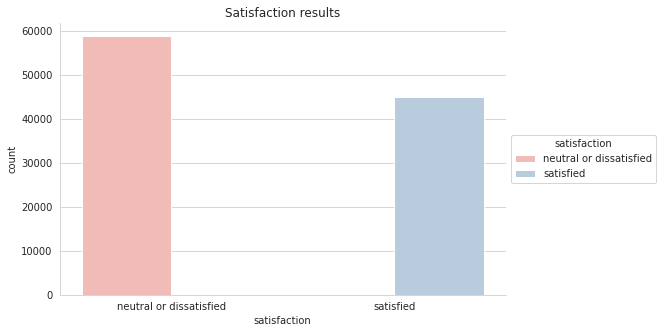

In [6]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="satisfaction", data = train, hue ="satisfaction", palette ="Pastel1" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [7]:
pcent_dissatisfaction = round((train[train["satisfaction"]=="neutral or dissatisfied"].shape[0]/train.shape[0])*100, 2)

print(f"{pcent_dissatisfaction}% of the passenger were neutral or dissatisfied with the service provided by the airline")

56.67% of the passenger were neutral or dissatisfied with the service provided by the airline


In [8]:
#create dummy variable 
satisfaction_dummmy = pd.get_dummies(train["satisfaction"], drop_first = True)
train = pd.concat([train, satisfaction_dummmy], axis=1)

# Gender
Working from the start, the next variable is "gender". The gender split in the dataset is relatively even with 49.25% of the passengers male. It should be acknowledged that this is a binary classification leaving little room for those who do not wish to disclose their gender or do not conform to the two traditional genders. Subsequently, in reruns of such surveys, criteria gender could be updated.

Leaving aside, it appears that the satisfaction level for both genders were relatively similar, with over 55% of individuals from both genders reporting that they were not satisfied with the service. 

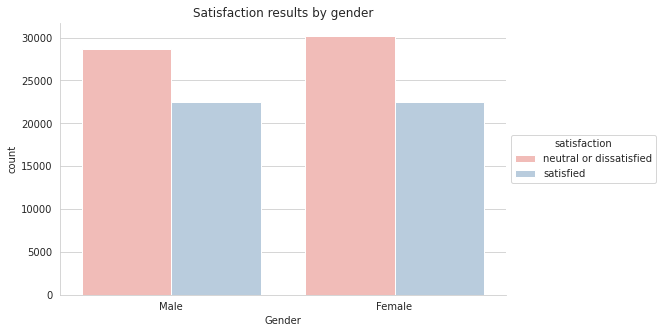

In [9]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = train, hue ="satisfaction", palette ="Pastel1" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results by gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [10]:
# create formula to calcuate the dissatisfied rate based on a variable
# method modified from https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s. 
#credit to Data Science With Chris. 
def pivot_satisfaction (train, target, highlight = True): 
    
    df_pivot = pd.pivot_table(
        train[["id", target, "satisfaction"]],
        index = [target], 
        columns = ["satisfaction"], 
        aggfunc = "count", 
        fill_value =0).reset_index()
    
    df_pivot.columns = [target, "neutral or dissatisfied", "satisfied"]
    
    df_pivot["total"] = df_pivot["satisfied"]+df_pivot["neutral or dissatisfied"]
    df_pivot["dissatisfied_rate"] = df_pivot["neutral or dissatisfied"]/df_pivot["total"]*100
    
    # this is added as the colour highlight does not work on some tables due to additional calcuations that are required.
    if highlight == True: 
        df_pivot = df_pivot.style.highlight_max(subset = "dissatisfied_rate", color = "lightgreen" )
    else: 
        df_pivot = df_pivot
        
    return df_pivot


# calcuate dissatisfied_rate for gender
pivot_satisfaction(train,"Gender")

,Gender,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Female,30193,22534,52727,57.262882
1,Male,28686,22491,51177,56.052524


In [11]:
# create dummy variables for gender 
Gender_dummmy = pd.get_dummies(train["Gender"], drop_first = True)
train = pd.concat([train, Gender_dummmy], axis=1) 

Gender_dummmy = pd.get_dummies(test["Gender"], drop_first = True)
test = pd.concat([test, Gender_dummmy], axis=1) 

# Customer Type
Customer type indicates whether a passenger is loyal or disloyal, with a large skew in favour of loyal customers. 

This variable when examined alongside overall satisfaction, highlights a major concern. There is a high number of loyal customers that are dissatisfied with the services. Given that individuals typically become loyal customers because they value the services offered by the said business, their lack of satisfaction suggests that the service may have changed recently or that the service is failing to meet the transforming market. As stated previously, loyal customers can be the backbone of a business and as such if the service does not improve, the business may face difficulty. 

Furthermore, disloyal customers not only back this trend, but further enforce it. Over 76% of disloyal customers stated that they were dissatisfied with the service. Therefore, the business, in its current form, may not be able to rely on a constant influx of new customers.

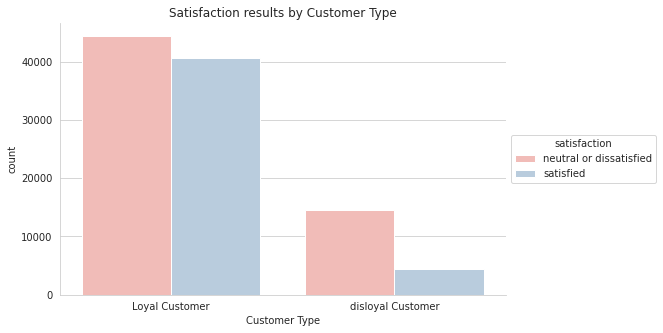

In [12]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = train, hue ="satisfaction" ,palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [13]:
# calcuate dissatisfied_rate for gender
pivot_satisfaction(train,"Customer Type")

,Customer Type,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Loyal Customer,44390,40533,84923,52.270881
1,disloyal Customer,14489,4492,18981,76.334229


In [14]:
# create dummy variable
Customer_dummmy = pd.get_dummies(train["Customer Type"], drop_first = True)

train = pd.concat([train, Customer_dummmy], axis=1) 

# Age
Examining the age variable, some aspects appear prominently. Firstly, it appears that the majority of those satisfied with the quality of the service were above average age, between 40 and 60. However, after approx. 60years, satisfaction suddenly drops. Likewise, many of the younger passengers found issues with the service. 

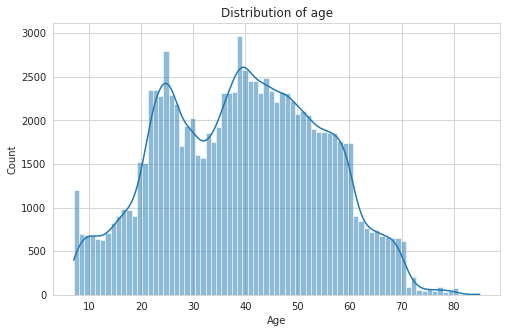

In [15]:
# create graph
plt.figure(figsize = (8,5))
sns.histplot( x= "Age", data = train, kde= True)

# format graph
plt.title("Distribution of age")
plt.show()

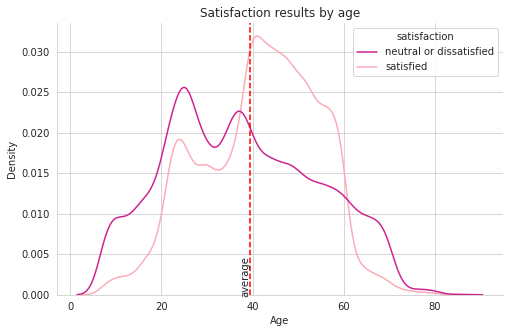

In [16]:
# create graph
plt.figure(figsize = (8,5))
sns.kdeplot(data = train, x= "Age", hue = "satisfaction", common_norm = False, palette ="RdPu_r")

# format graph
plt.title("Satisfaction results by age")
sns.despine(top = True, right = True, left = False, bottom = False)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
plt.axvline(train["Age"].mean(),ls = "--", color = "red")
plt.text(train["Age"].mean()-2,0,'average',rotation=90)
plt.show()

In [17]:
avg_age = int(train["Age"].mean())
print(f"Average age of passengers was {avg_age} years old.")

Average age of passengers was 39 years old.


The ages can be grouped into categories, under 40, 40 to 60 and over 40. Doing so reveals that for those under 40, the rate of dissatisfaction is over 65%. For those between 40 and 60, the dissatisfaction drops to 42%. However for those over 60% dissatisfied is over 70%. 

It should be also stated that there may be issues in the recording of this data. There is a considerable peak in the values for those who are 10 years old who reported that the service was dissatisfactory. Whilst 10 year olds may have completed this form, due to the nature of the questions, there is a possibility that a third party may have aided in these submissions. The ages could call into question where there were bad faith actors responding to the questions. 

In [18]:
# def group ages
def age_group (row): 
    if row < 40: 
        return "Young"
    if (row >= 40) & (row < 60): 
        return "middle age"
    if row >= 60:
        return "senior"
    else:
        return "no age"

# apply function to train dataset
train["Age_group"] = train["Age"].apply(lambda row: age_group(row))


# calcuate dissatisfied_rate
pivot_satisfaction(train,"Age_group")

,Age_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Young,33692,17694,51386,65.566497
1,middle age,18104,24695,42799,42.300054
2,senior,7083,2636,9719,72.877868


In such cases, depending on the situation the data pertaining to extremely young children could be dropped. However, as the test dataset also includes such age groups, for the purpose of this exercise, they must remain. This is to provide the model with an understanding of the full spectrum of data.

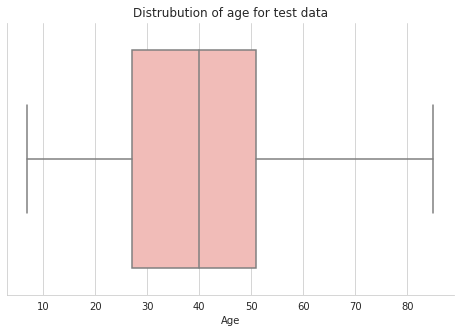

In [19]:
# create graph
plt.figure(figsize = (8,5))
sns.boxplot(x = "Age", data = test,palette ="Pastel1" )

# format graph
plt.title("Distrubution of age for test data")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

# Type of travel 
Type of business provides revealing insight into the operations of the airline. It appears that it may specialise in business travellers as the large share of the passengers utilised the airline for business travel. Furthermore, such travellers were more likely to find the service satisfactory. 

However, those who travelled for personal reasons found the experience extremely poor, approx. 90%. This is concerning and the airline should examine the issues relating to their service and rectify any issues with the utmost urgency, if they wish to retain customers.

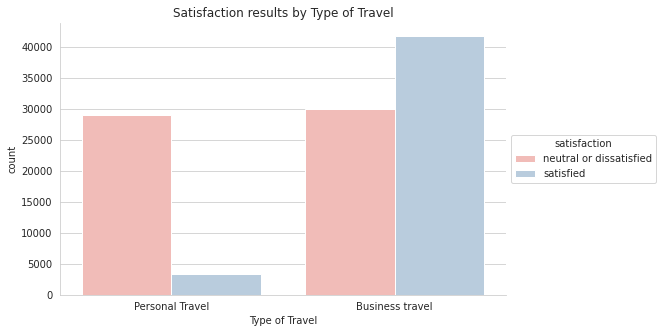

In [20]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Type of Travel", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Type of Travel")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [21]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Type of Travel")

,Type of Travel,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business travel,29909,41746,71655,41.740283
1,Personal Travel,28970,3279,32249,89.832243


In [22]:
# create dummy 
Type_dummmy = pd.get_dummies(train["Type of Travel"], drop_first = True)

train = pd.concat([train, Type_dummmy], axis=1) 

# Classes 
Classes also highlight the dominance of business travel as the majority who travelled via business class were satisfied with the service they received. In contrast, those who were in eco class were particularly dissatisfied with the service, with 81% voicing dissatisfaction. Given that 45% of the passengers travelled via eco, the airline should focus on improving their services in this area. 

This is particularly the case as even the business travellers who used eco were disappointed with the service. The poor quality of eco is also appears to be the major factor in the low ratings amongst those who travelled for personal reasons and they were more likely to use eco class. 

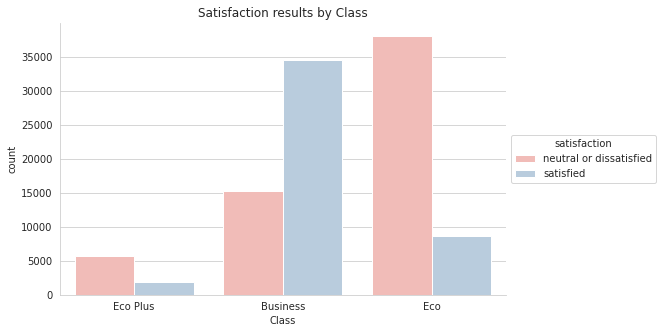

In [23]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Class", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [24]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Class")

,Class,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business,15185,34480,49665,30.574852
1,Eco,38044,8701,46745,81.386245
2,Eco Plus,5650,1844,7494,75.393648


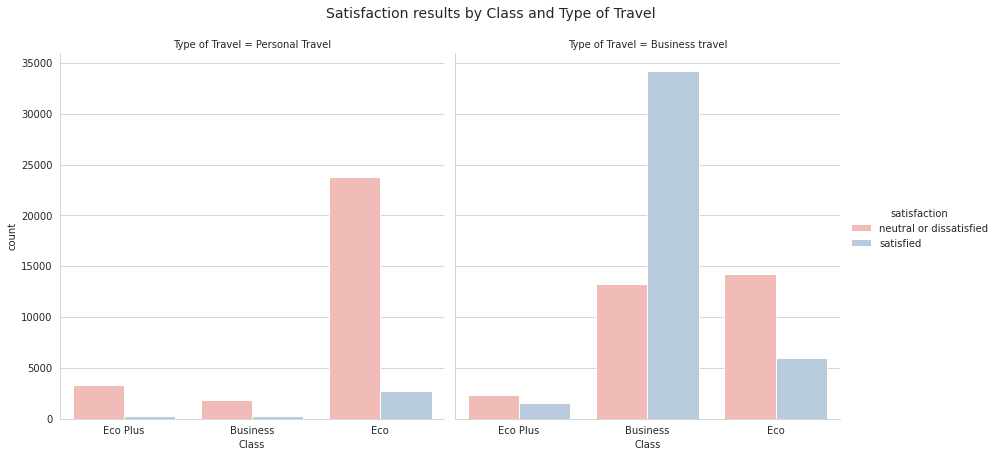

In [25]:
# create graph
sns.catplot( x ="Class", hue ="satisfaction", kind = "count", col = "Type of Travel", 
            data = train ,palette ="Pastel1", height = 6)

# format graph
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

In [26]:
# library for encoding variables
from sklearn.preprocessing import LabelEncoder 

# encode class variable
le = LabelEncoder()
train['Class_code'] = le.fit_transform(train['Class'])
test["Class_code"] = le.fit_transform(test["Class"])

# Flying distance
At face value, it appears that the airline holds specific strengths in long distance travel. Further investigation reveals that the rate of dissatisfaction differs if the individual has travelled more or less than 1500. (Note: units assumed as metadata not available) 

For those who travelled less than 1500km, dissatisfaction was as high as 66%. However, if the passenger travelled more than 1500km, they were only 34% likely to be dissatisfied with the service. As some airlines offer different services depending on long /short haul such as luggage size, the airline’s short haul offering may be weak. Further discussions with the airline are required to confirm if this is indeed the case. 

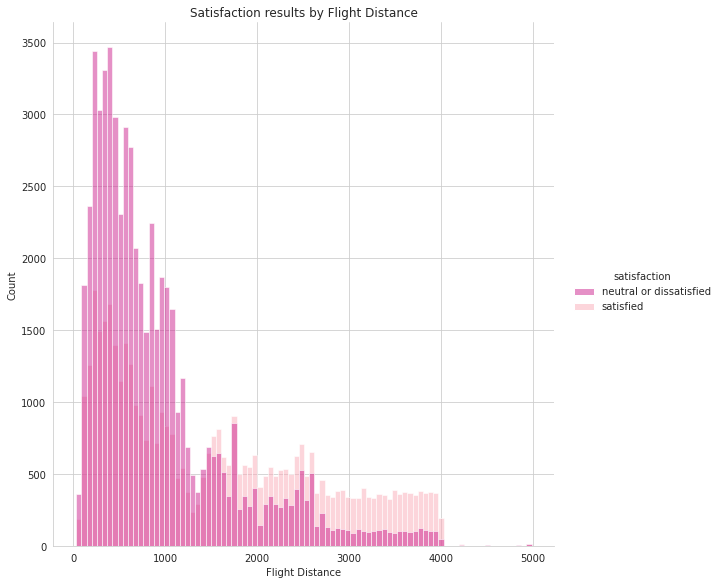

In [27]:
# create graph
sns.displot(x = "Flight Distance", data = train, hue ="satisfaction", height = 8,palette ="RdPu_r"  )
plt.title("Satisfaction results by Flight Distance")


plt.show()

In [28]:
# functions to group distances 
def distance_group (row): 
    if row < 1500: 
        return "less than 1500"
    else:
        return "more than 1500"
    
# run function to create new variable   
train["distance_group"] = train["Flight Distance"].apply(lambda row: distance_group(row))

# calcuate dissatisfied_rate
pivot_satisfaction(train,"distance_group")

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,less than 1500,48138,24256,72394,66.494461
1,more than 1500,10741,20769,31510,34.087591


On the other hand, comparing the satisfaction rate dependent on distance separated by type, highlights that the travel type had a bigger impact on satisfaction. For example, regardless of distance, those that travelled for personal reasons were nearly 90% dissatisfied with the service. For business travellers, if they travelled less than 1500km, they were 51% likely to find the service dissatisfying. However, if they travelled more than 1500km, they were only 26% likely to find the service dissatisfying.  

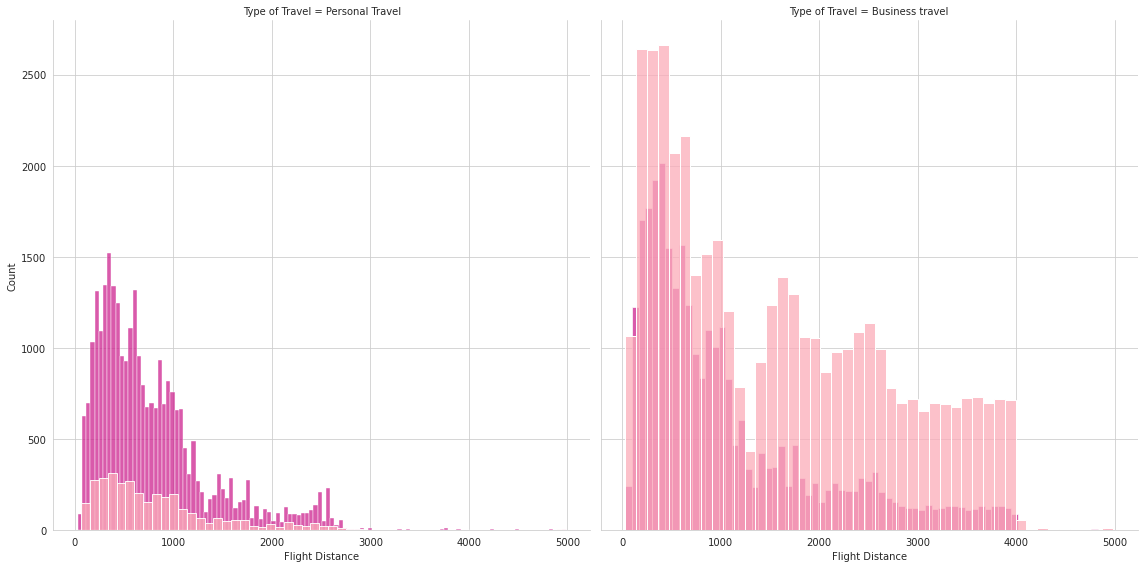

In [29]:
# create graph
g = sns.FacetGrid(train, col = "Type of Travel", hue ="satisfaction", height = 8, palette ="RdPu_r" )
g.map(sns.histplot, "Flight Distance",  )
plt.show()

In [30]:
# create subset of dataset for personal travel and business
personal = train[train["Type of Travel"]=="Personal Travel"]
business =train[train["Type of Travel"]=="Business travel"]

# calcuate dissatisfied_rate for distance_group - business
pivot_satisfaction(business,"distance_group")

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,less than 1500,22679,21405,44084,51.444969
1,more than 1500,7230,20341,27571,26.223206


In [31]:
# calcuate dissatisfied_rate for distance_group - personal
pivot_satisfaction(personal,"distance_group")

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,less than 1500,25459,2851,28310,89.929354
1,more than 1500,3511,428,3939,89.134298


# Inflight WIFI service
At this point, the dataset shifts its attention to the subjective variables concerning the customer’s perception of various aspects of the service they received, beginning with inflight WIFI. 

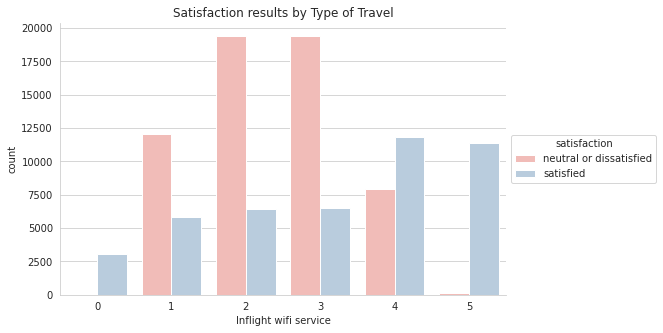

In [32]:
# Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)


# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Inflight wifi service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Type of Travel")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

For this variable, it seems that in general if the passenger rated the service between 1 and 3, they were more likely to consider that the overall service was poor. In contrast, as travel type had a major impact on satisfaction, the data can be viewed with respect to this factor. 

In doing so highlights that for business passengers, they followed the overall trend previously identified. Between 1 and 3 ratings for WIFI, the overall rate of dissatisfaction rises. However, at score 4, the rating drops significantly. 

Personal travellers also recorded a similar pattern. On the other hand, as they were overall more likely to be dissatisfied, for scores between 1 to 3 for inflight WIFI, all travellers were likely to rate the overall service dissatisfactory. That said, the biggest level of satisfaction was identified amongst the personal travellers who identified that the WIFI was 5 star. 

In [33]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,8,3095,3103,0.257815
1,1,12034,5806,17840,67.455157
2,2,19407,6423,25830,75.133566
3,3,19386,6482,25868,74.942013
4,4,7938,11856,19794,40.103062
5,5,106,11363,11469,0.924231


In [34]:
# calcuate dissatisfied_rate for Inflight wifi service - business
pivot_satisfaction(business,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,8,2444,2452,0.326264
1,1,6227,5806,12033,51.749356
2,2,9832,6423,16255,60.486004
3,3,9586,6482,16068,59.658949
4,4,4150,10529,14679,28.271681
5,5,106,10062,10168,1.042486


In [35]:
# calcuate dissatisfied_rate for Inflight wifi service - personal

pivot_satisfaction(personal,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,651,651,0.000000
1,1,5807,0,5807,100.000000
2,2,9575,0,9575,100.000000
3,3,9800,0,9800,100.000000
4,4,3788,1327,5115,74.056696
5,5,0,1301,1301,0.000000


# Departure/Arrival time convenient
For Departure/Arrival time convenience, it appears that the rate of convenience had a little impact on the overall satisfaction. That said, for those who rated the time as extremely convenient (5 stars), their dissatisfaction with the service was only 30%. 

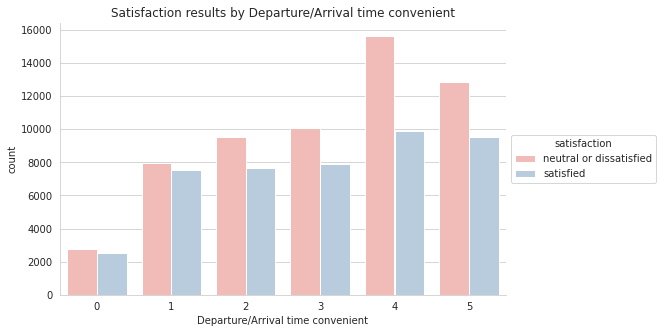

In [36]:
# Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

# create graph
plt.figure(figsize = (8,5))
sns.countplot(x = "Departure/Arrival time convenient", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Departure/Arrival time convenient")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [37]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,2780,2520,5300,52.452830
1,1,7957,7541,15498,51.342109
2,2,9534,7657,17191,55.459252
3,3,10093,7873,17966,56.178337
4,4,15640,9906,25546,61.222892
5,5,12875,9528,22403,57.469982


In [38]:
# calcuate dissatisfied_rate for Departure/Arrival time convenient - business
pivot_satisfaction(business,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1992,2439,4431,44.955992
1,1,5513,7257,12770,43.171496
2,2,6782,7348,14130,47.997169
3,3,6635,7531,14166,46.837498
4,4,5372,8704,14076,38.164251
5,5,3615,8467,12082,29.920543


In [39]:
# calcuate dissatisfied_rate for Departure/Arrival time convenient - personal
pivot_satisfaction(personal,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,788,81,869,90.678941
1,1,2444,284,2728,89.589443
2,2,2752,309,3061,89.905260
3,3,3458,342,3800,91.000000
4,4,10268,1202,11470,89.520488
5,5,9260,1061,10321,89.719988


# Ease of Online booking
Similar to WIFI, those who were satisfied with the booking service were more likely to rate the overall service satisfactory. 

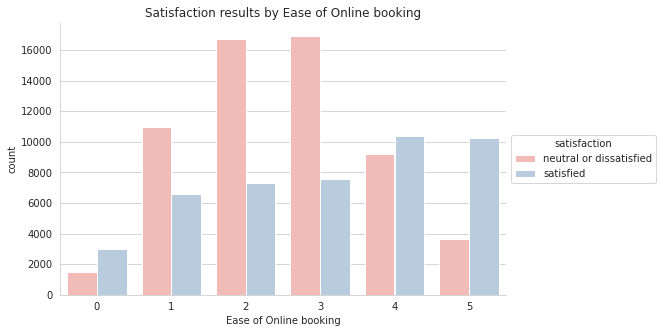

In [40]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x = "Ease of Online booking", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Ease of Online booking")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [41]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1507,2980,4487,33.585915
1,1,10935,6590,17525,62.396576
2,2,16720,7301,24021,69.605762
3,3,16912,7537,24449,69.172563
4,4,9180,10391,19571,46.906137
5,5,3625,10226,13851,26.171396


On the other hand, for personal travellers, if the booking service was poor, they were extremely likely to find the overall service poor. 

In [42]:
# calcuate dissatisfied_rate for Ease of Online booking - business
pivot_satisfaction(business,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,389,2292,2681,14.509511
1,1,5580,6532,12112,46.070013
2,2,7730,7268,14998,51.540205
3,3,7755,7444,15199,51.023094
4,4,5288,9218,14506,36.453881
5,5,3167,8992,12159,26.046550


In [43]:
# calcuate dissatisfied_rate for Ease of Online booking - personal
pivot_satisfaction(personal,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1118,688,1806,61.904762
1,1,5355,58,5413,98.928505
2,2,8990,33,9023,99.634268
3,3,9157,93,9250,98.994595
4,4,3892,1173,5065,76.841066
5,5,458,1234,1692,27.068558


# Gate location
It appears that gate location may have a relatively limited impact on the overall satisfaction. General level of correlation is low and regardless of travel type, there was no major fluctuation in the overall satisfaction dependent on the convenience of the gate location. 

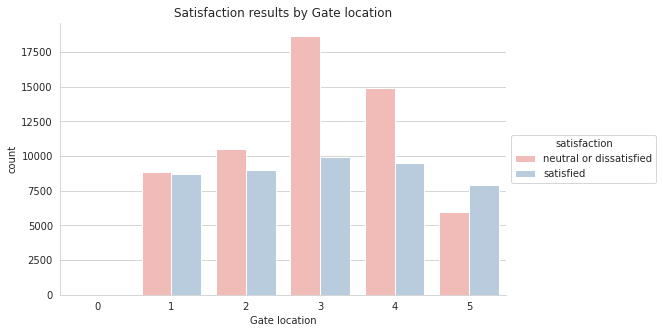

In [44]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Gate location", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Gate location")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [45]:
# calcuate correlation for gate location and satisfaction 
train[['Gate location', "satisfied"]].corr()

,Gate location,satisfied
Gate location,1.000000,0.000682
satisfied,0.000682,1.000000


In [46]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,1,1,0.000000
1,1,8859,8703,17562,50.444141
2,2,10494,8965,19459,53.928773
3,3,18655,9922,28577,65.279770
4,4,14936,9490,24426,61.147957
5,5,5935,7944,13879,42.762447


In [47]:
# calcuate dissatisfied_rate for Gate location - business
pivot_satisfaction(business,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,1,1,0.000000
1,1,4601,8206,12807,35.925666
2,2,5267,8360,13627,38.651207
3,3,8561,8781,17342,49.365702
4,4,7623,8660,16283,46.815697
5,5,3857,7738,11595,33.264338


In [48]:
# calcuate dissatisfied_rate for Gate location - personal
pivot_satisfaction(personal,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4258,497,4755,89.547844
1,2,5227,605,5832,89.626200
2,3,10094,1141,11235,89.844237
3,4,7313,830,8143,89.807196
4,5,2078,206,2284,90.980736


# Food and drink
The impact on overall satisfaction based on food and drink appears to be somewhat weak. However, for business travellers, if they found the food to be particularly poor, they were more likely to rate the overall satisfaction poor. As such, there may be benefits in ensuring that the food is not rated as a 1 by those who access it.

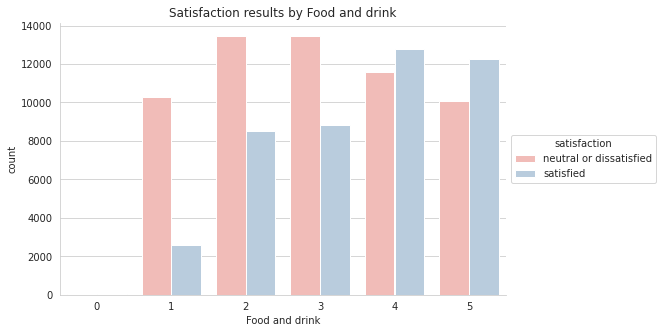

In [49]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Food and drink", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Food and drink")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [50]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,57,50,107,53.271028
1,1,10269,2568,12837,79.995326
2,2,13458,8530,21988,61.206112
3,3,13461,8839,22300,60.363229
4,4,11571,12788,24359,47.501950
5,5,10063,12250,22313,45.099269


In [51]:
# calcuate dissatisfied_rate for  Food and drink - business 
pivot_satisfaction(business,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,23,32,55,41.818182
1,1,5749,2062,7811,73.601331
2,2,7146,7862,15008,47.614606
3,3,7121,8165,15286,46.585111
4,4,5584,12073,17657,31.624851
5,5,4286,11552,15838,27.061498


In [52]:
# calcuate dissatisfied_rate for Food and drink -  personal
pivot_satisfaction(personal,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,34,18,52,65.384615
1,1,4520,506,5026,89.932352
2,2,6312,668,6980,90.429799
3,3,6340,674,7014,90.390647
4,4,5987,715,6702,89.331543
5,5,5777,698,6475,89.220077


# Online boarding 
In general, it appears that the online boarding services are impactful on the customer’s overall level of satisfaction. This is, however, felt more by business travellers. If they experienced excellent online boarding services, they were more likely to rate the service highly. It seems that for these travellers, they value convenience highly and therefore ensuring such services will garner more business travellers. 

For others, whilst they valued online boarding, the impact of it on overall satisfaction was not as significant as business travellers. 

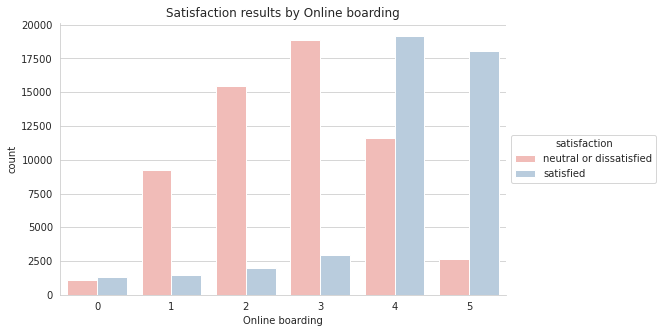

In [53]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Online boarding", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Online boarding")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [54]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1077,1351,2428,44.357496
1,1,9219,1473,10692,86.223345
2,2,15486,2019,17505,88.466153
3,3,18845,2959,21804,86.429096
4,4,11596,19166,30762,37.695859
5,5,2656,18057,20713,12.822865


In [55]:
# calcuate dissatisfied_rate for Online boarding - business
pivot_satisfaction(business,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,227,865,1092,20.787546
1,1,4748,1377,6125,77.518367
2,2,8211,1895,10106,81.248763
3,3,10616,2733,13349,79.526556
4,4,5868,17942,23810,24.645107
5,5,239,16934,17173,1.391720


In [56]:
# calcuate dissatisfied_rate for Online boarding - personal
pivot_satisfaction(personal,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,850,486,1336,63.622754
1,1,4471,96,4567,97.897964
2,2,7275,124,7399,98.324098
3,3,8229,226,8455,97.327025
4,4,5728,1224,6952,82.393556
5,5,2417,1123,3540,68.276836


# Seat comfort 
Similar to some of the previous variables, seat comfort on an overall level shows that those who rated the seats extremely comfortable, also rated the overall experience with the airline highly. 

This is particularly prominent with business travellers, for whom if the seats were found to be particularly conformable, the rate of dissatisfaction fell to 28% or lower.


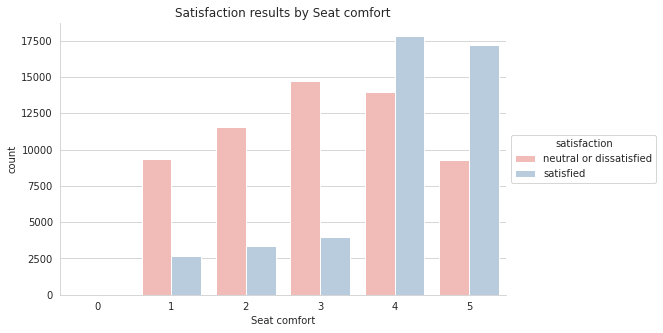

In [57]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Seat comfort", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Seat comfort")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [58]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,9380,2695,12075,77.681159
2,2,11558,3339,14897,77.586091
3,3,14741,3955,18696,78.845742
4,4,13940,17825,31765,43.884779
5,5,9259,17211,26470,34.979222


In [59]:
# calcuate dissatisfied_rate for Seat comfort -business
pivot_satisfaction(business,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,4732,2177,6909,68.490375
2,2,6533,2762,9295,70.285100
3,3,9005,3357,12362,72.844200
4,4,6730,16957,23687,28.412209
5,5,2908,16493,19401,14.988918


For personal travel, the seat comfort had relatively no impact as the rates of dissatisfaction between 89 to 90%. 

In [60]:
# calcuate dissatisfied_rate for Seat comfort -personal
pivot_satisfaction(personal,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4648,518,5166,89.972900
1,2,5025,577,5602,89.700107
2,3,5736,598,6334,90.558889
3,4,7210,868,8078,89.254766
4,5,6351,718,7069,89.842976


# Inflight entertainment / onboard service 
The trends in seat comfort are also reflected in inflight entertainment and onboard service. The better the experience, the higher the satisfaction rating. However, business travellers were more sensitive to this than personal travellers. Personal travellers maintained a similar level of dissatisfaction regardless of their rating of the inflight entertainment/ onboard services.  

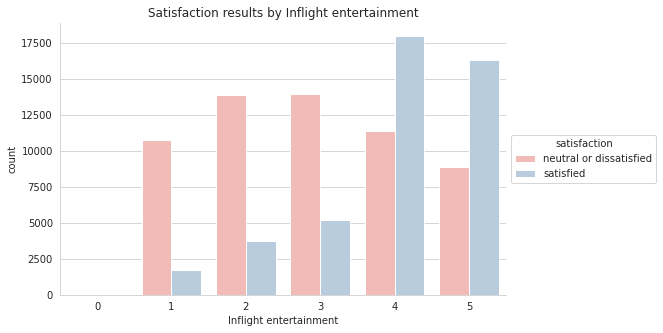

In [61]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Inflight entertainment", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Inflight entertainment")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [62]:
# calcuate dissatisfied_rate for subset
pivot_satisfaction(train,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,14,0,14,100.000000
1,1,10733,1745,12478,86.015387
2,2,13875,3762,17637,78.669842
3,3,13970,5169,19139,72.992319
4,4,11423,18000,29423,38.823369
5,5,8864,16349,25213,35.156467


In [63]:
# calcuate dissatisfied_rate for Inflight entertainment - business
pivot_satisfaction(business,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,14,0,14,100.000000
1,1,5742,1156,6898,83.241519
2,2,7949,3090,11039,72.008334
3,3,7861,4490,12351,63.646668
4,4,5355,17314,22669,23.622568
5,5,2988,15696,18684,15.992293


In [64]:
# calcuate dissatisfied_rate for Inflight entertainment -  personal
pivot_satisfaction(personal,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4991,589,5580,89.444444
1,2,5926,672,6598,89.815095
2,3,6109,679,6788,89.997054
3,4,6068,686,6754,89.843056
4,5,5876,653,6529,89.998468


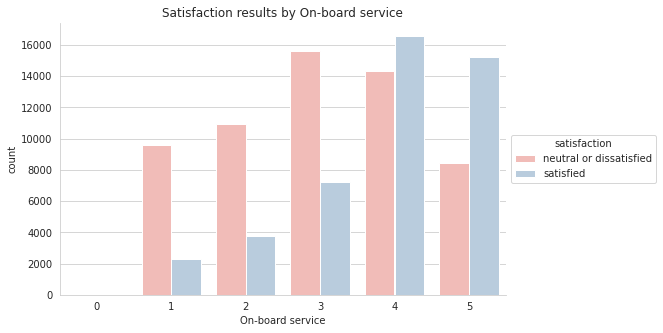

In [65]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="On-board service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by On-board service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [66]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,9572,2300,11872,80.626685
2,2,10927,3754,14681,74.429535
3,3,15625,7208,22833,68.431656
4,4,14296,16571,30867,46.314835
5,5,8456,15192,23648,35.757781


In [67]:
# calcuate dissatisfied_rate for On-board service - business
pivot_satisfaction(business,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,5790,1851,7641,75.775422
2,2,6850,3318,10168,67.368214
3,3,8066,6345,14411,55.971133
4,4,6804,15701,22505,30.233281
5,5,2396,14531,16927,14.154900


In [68]:
# calcuate dissatisfied_rate for On-board service - personal
pivot_satisfaction(personal,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,3782,449,4231,89.387852
1,2,4077,436,4513,90.339021
2,3,7559,863,8422,89.753028
3,4,7492,870,8362,89.595790
4,5,6060,661,6721,90.165154


Working through the remaining variables assessing the service, this pattern continues where personal travellers remain unaffected in their dissatisfaction of the service regardless of how one aspect of the service was outstanding.

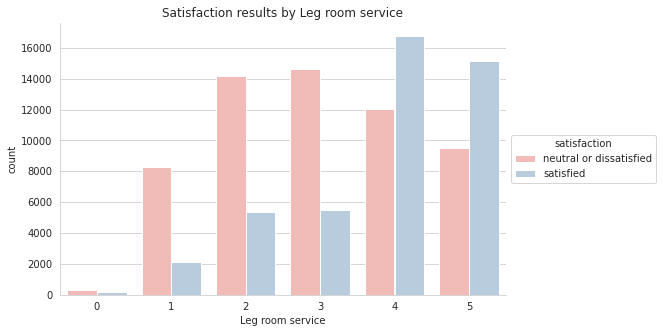

In [69]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Leg room service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Leg room service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [70]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Leg room service")

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,306,166,472,64.830508
1,1,8253,2100,10353,79.716024
2,2,14162,5363,19525,72.532650
3,3,14623,5475,20098,72.758483
4,4,12025,16764,28789,41.769426
5,5,9510,15157,24667,38.553533


In [71]:
# calcuate dissatisfied_rate for Leg room service - business
pivot_satisfaction(business,"Leg room service")

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,72,0,72,100.000000
1,1,4821,1825,6646,72.539874
2,2,7207,4789,11996,60.078359
3,3,7421,4897,12318,60.245170
4,4,5910,15899,21809,27.098904
5,5,4478,14336,18814,23.801424


In [72]:
# calcuate dissatisfied_rate for Leg room service - personal
pivot_satisfaction(personal,"Leg room service")

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,234,166,400,58.500000
1,1,3432,275,3707,92.581602
2,2,6955,574,7529,92.376146
3,3,7202,578,7780,92.570694
4,4,6115,865,6980,87.607450
5,5,5032,821,5853,85.973005


All above the service has to be exceptional.

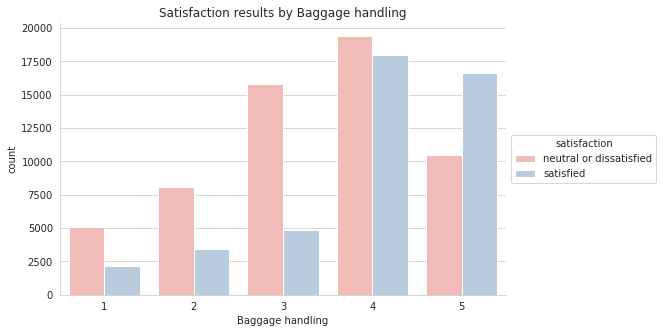

In [73]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Baggage handling", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Baggage handling")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [74]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Baggage handling")

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,5083,2154,7237,70.236286
1,2,8117,3404,11521,70.453954
2,3,15766,4866,20632,76.415277
3,4,19405,17978,37383,51.908622
4,5,10508,16623,27131,38.730603


In [75]:
# calcuate dissatisfied_rate for Baggage handling - business
pivot_satisfaction(business,"Baggage handling")

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2571,1856,4427,58.075446
1,2,4808,3042,7850,61.248408
2,3,10025,4227,14252,70.341005
3,4,9636,16860,26496,36.367754
4,5,2869,15761,18630,15.399893


In [76]:
# calcuate dissatisfied_rate for Baggage handling - personal
pivot_satisfaction(personal,"Baggage handling")

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2512,298,2810,89.395018
1,2,3309,362,3671,90.138927
2,3,5741,639,6380,89.984326
3,4,9769,1118,10887,89.730872
4,5,7639,862,8501,89.860016


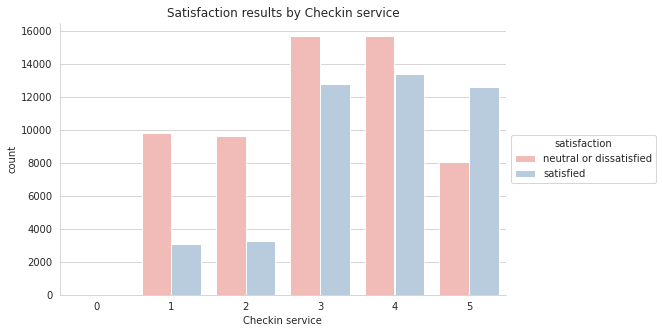

In [77]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Checkin service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Checkin service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [78]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Checkin service")

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,9806,3084,12890,76.074476
2,2,9640,3253,12893,74.769255
3,3,15694,12752,28446,55.171202
4,4,15692,13363,29055,54.007916
5,5,8046,12573,20619,39.022261


In [79]:
# calcuate dissatisfied_rate for Checkin service - business
pivot_satisfaction(business,"Checkin service")

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,6365,2707,9072,70.160935
2,2,6254,2874,9128,68.514461
3,3,7658,11812,19470,39.332306
4,4,7461,12447,19908,37.477396
5,5,2170,11906,14076,15.416311


In [80]:
# calcuate dissatisfied_rate for Checkin service - personal
pivot_satisfaction(personal,"Checkin service")

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,3441,377,3818,90.125720
1,2,3386,379,3765,89.933599
2,3,8036,940,8976,89.527629
3,4,8231,916,9147,89.985788
4,5,5876,667,6543,89.805899


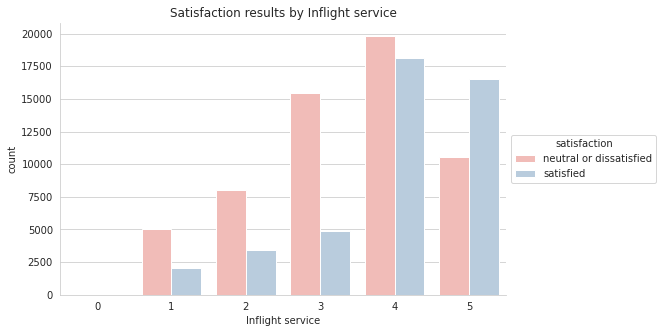

In [81]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Inflight service", data = train, hue ="satisfaction",palette ="Pastel1" )
plt.title("Satisfaction results by Inflight service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [82]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Inflight service")

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,5030,2054,7084,71.005082
2,2,8006,3451,11457,69.878677
3,3,15448,4851,20299,76.102271
4,4,19816,18129,37945,52.222954
5,5,10576,16540,27116,39.002803


In [83]:
# calcuate dissatisfied_rate for Inflight service - business
pivot_satisfaction(business,"Inflight service")

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,2611,1796,4407,59.246653
2,2,4819,3084,7903,60.976844
3,3,9843,4241,14084,69.887816
4,4,9696,16927,26623,36.419637
5,5,2937,15698,18635,15.760665


In [84]:
# calcuate dissatisfied_rate for Inflight service - personal
pivot_satisfaction(personal,"Inflight service")

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2419,258,2677,90.362346
1,2,3187,367,3554,89.673607
2,3,5605,610,6215,90.185036
3,4,10120,1202,11322,89.383501
4,5,7639,842,8481,90.071925


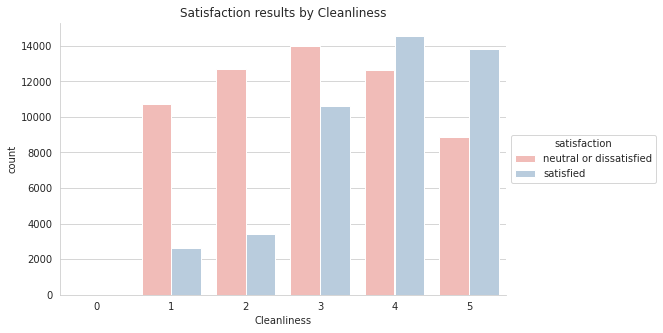

In [85]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Cleanliness", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Cleanliness")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [86]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,12,0,12,100.000000
1,1,10705,2613,13318,80.379937
2,2,12696,3436,16132,78.700719
3,3,13961,10613,24574,56.812078
4,4,12629,14550,27179,46.466022
5,5,8876,13813,22689,39.120279


In [87]:
# calcuate dissatisfied_rate for Cleanliness - business
pivot_satisfaction(business,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,12,0,12,100.000000
1,1,6124,2070,8194,74.737613
2,2,7326,2836,10162,72.092108
3,3,7397,9903,17300,42.757225
4,4,6075,13798,19873,30.569114
5,5,2975,13139,16114,18.462207


In [88]:
# calcuate dissatisfied_rate for Cleanliness - personal
pivot_satisfaction(personal,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4581,543,5124,89.402810
1,2,5370,600,5970,89.949749
2,3,6564,710,7274,90.239208
3,4,6554,752,7306,89.707090
4,5,5901,674,6575,89.749049


# Total score
Until now, services have been reviewed individually. However, data indicates that the level of overall satisfaction can be estimated when the individual service scores are examined in its entirety. In general and specifically for business travellers, the rate of satisfaction drops significantly if the total score was more than 75%.

Although the fluctuation is not as clearly defined as the previous categories, even amongst the personal travellers, if they scored the services as 75%, rated their overall experience satisfactory 20.7% of the time compared to just over 8% if the services were rated below 75%. 

In [89]:
# single out variables which are related to service scores
service_scores = train[['Inflight wifi service','Departure/Arrival time convenient', 
                              'Ease of Online booking','Gate location', 'Food and drink', 
                              'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service',
                              'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']]

# calculate sum of scores
train["Total_score"] = service_scores.sum(axis = 1)

# find max possible score 
max_score = len(service_scores.columns)*5

# convert sum of scores to percentage
train["Total_score_percent"] = round((train["Total_score"]/max_score)*100,1)

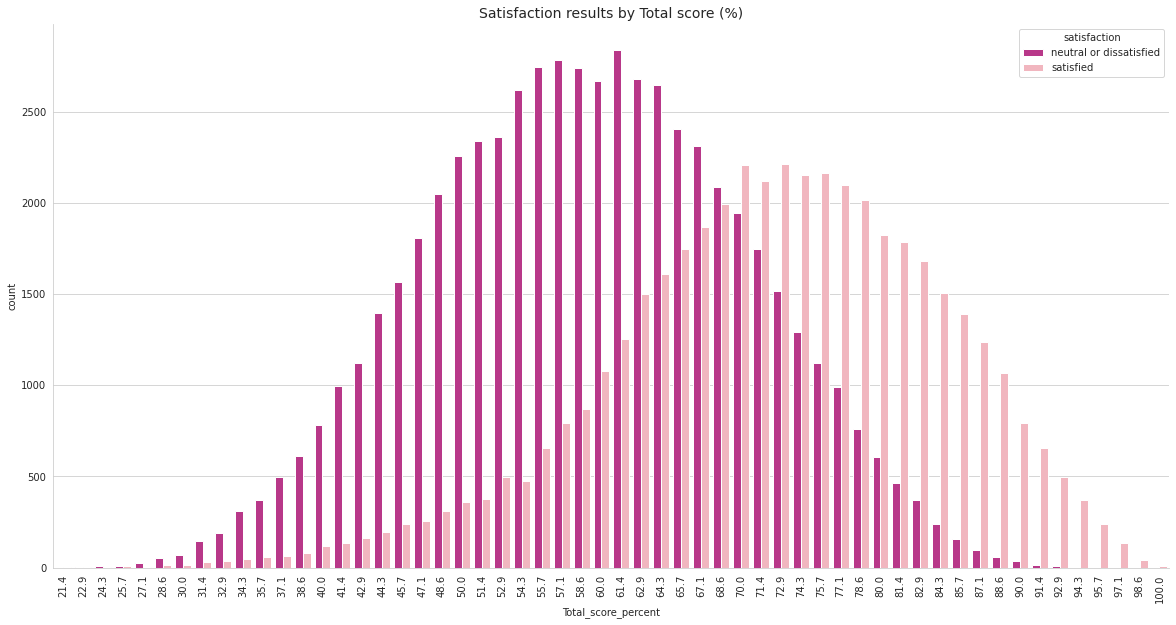

In [90]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Total_score_percent", data = train, hue ="satisfaction",palette ="RdPu_r" )

# format graph
plt.title("Satisfaction results by Total score (%)", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = "satisfaction")
plt.show()

In [91]:
# function to group scores
def total_group (row): 
    if row < 50: 
        return "<50"
    if (row >= 50) & (row < 75): 
        return "50-75"
    if row >= 70:
        return ">75"
    else:
        return "0"

    # apply function    
train["total_group"] = train["Total_score_percent"].apply(lambda row: total_group(row))

#https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s

# reset personal / business
personal = train[train["Type of Travel"]=="Personal Travel"]
business =train[train["Type of Travel"]=="Business travel"]

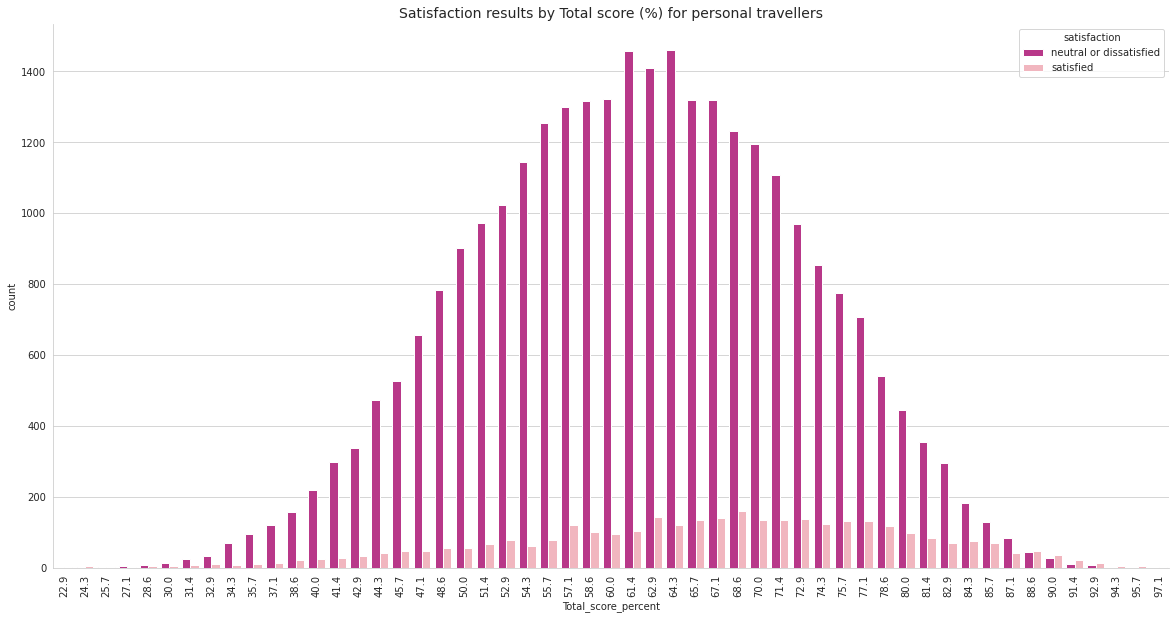

In [92]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Total_score_percent", data = personal, hue ="satisfaction",palette ="RdPu_r" )

# format graph 
plt.xticks(rotation=90)
plt.title("Satisfaction results by Total score (%) for personal travellers", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='upper right',title = "satisfaction")
plt.show()

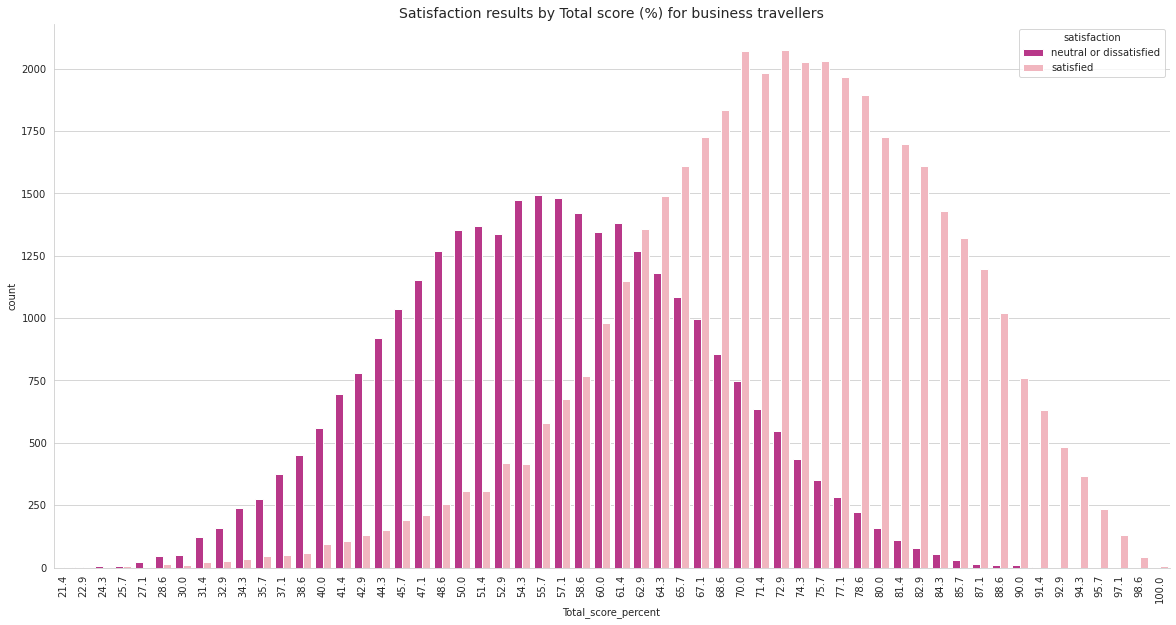

In [93]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Total_score_percent", data = business, hue ="satisfaction",palette ="RdPu_r" )

# format graph
plt.xticks(rotation=90)
plt.title("Satisfaction results by Total score (%) for business travellers", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False, )
plt.legend(loc='upper right',title = "satisfaction")
plt.show()

In [94]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"total_group")

,total_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,50-75,41969,23759,65728,63.852544
1,<50,11994,1773,13767,87.121377
2,>75,4916,19493,24409,20.140112


In [95]:
# calcuate dissatisfied_rate for total_group - business 
pivot_satisfaction(business,"total_group")

,total_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,50-75,20410,21778,42188,48.378686
1,<50,8177,1415,9592,85.248123
2,>75,1322,18553,19875,6.651572


In [96]:
# calcuate dissatisfied_rate for total_group - personal
personal_group = pivot_satisfaction(personal,"total_group", False)

# add satisfied rate column
personal_group["satisfied_rate"]=100-personal_group["dissatisfied_rate"]
personal_group

,total_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate,satisfied_rate
0,50-75,21559,1981,23540,91.584537,8.415463
1,<50,3817,358,4175,91.425150,8.574850
2,>75,3594,940,4534,79.267755,20.732245


# Departure Delay in Minutes
Due to the distribution of the Departure Delay in Minutes, it can be difficult to understand visually. 

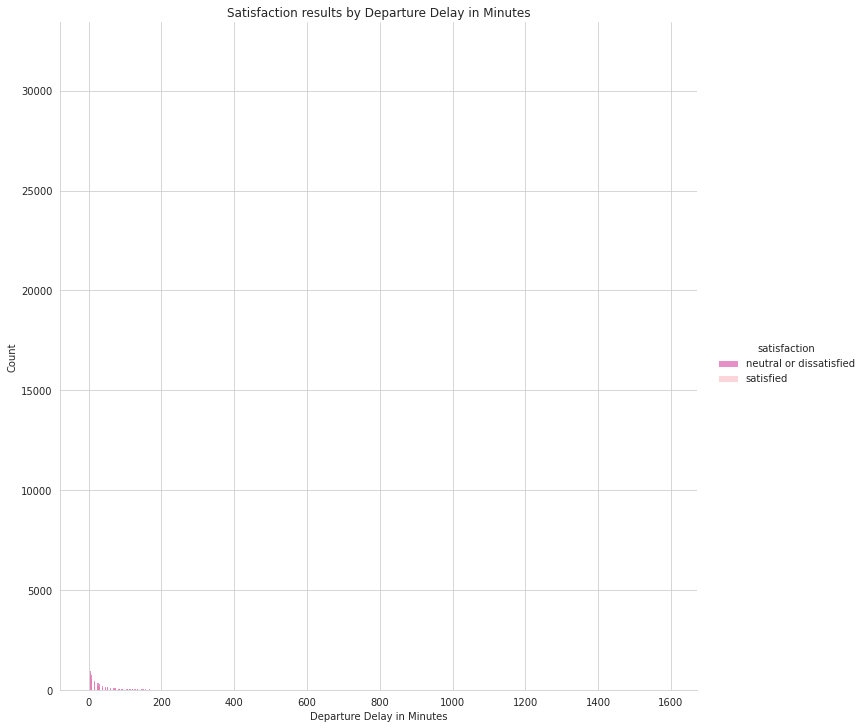

In [97]:
# create graph
sns.displot(x = "Departure Delay in Minutes", data = train, hue ="satisfaction", 
            height = 10,palette ="RdPu_r" )

# format graph
plt.title("Satisfaction results by Departure Delay in Minutes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [98]:
# view statiscal data for depature delay in mins 
train["Departure Delay in Minutes"].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

Therefore, the data needs to be grouped for better insight. In doing so, it reveals that the more the delay, the more likely the individual was to be unsatisfied with the services. However, business travellers were more likely to be forgiving of delays as their dissatisfaction rate was below the overall rate. Personal travellers were particularly sensitive to delays, as even an hour’s delay caused a 5 percentage point increase in the rate of dissatisfaction. 

In [99]:
# convert departure delya to hours
train["Departure Delay in hour"]= round(train["Departure Delay in Minutes"]/60,1)

# function to calcuate scale of delay 
# method from https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s
def scale_of_delay (row): 
    if row == 0: 
        return "on time"
    if (row > 0) & (row < 1): 
        return "less than hour"
    if (row >= 1) & (row < 12): 
        return "between 1 to 12 hours"
    if row >= 12:
        return "more than 12 hours"
    else:
        return "0"

# apply function    
train["scale_of_departure_delay"] = train["Departure Delay in hour"].apply(lambda row: scale_of_delay(row))

# reset subset
personal = train[train["Type of Travel"]=="Personal Travel"]
business =train[train["Type of Travel"]=="Business travel"]

# calcuate dissatisfied_rate
pivot_satisfaction(train,"scale_of_departure_delay", False).loc[[3,1,0, 2],:]

,scale_of_departure_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate
3,on time,35796,30103,65899,54.319489
1,less than hour,18034,12109,30143,59.828152
0,between 1 to 12 hours,5040,2808,7848,64.220183
2,more than 12 hours,9,5,14,64.285714


In [100]:
# calcuate dissatisfied_rate for scale_of_departure_delay - business
pivot_satisfaction(business,"scale_of_departure_delay", False).loc[[3,1,0, 2],:]

,scale_of_departure_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate
3,on time,17725,27633,45358,39.078002
1,less than hour,9409,11413,20822,45.187782
0,between 1 to 12 hours,2770,2695,5465,50.686185
2,more than 12 hours,5,5,10,50.000000


In [101]:
# calcuate dissatisfied_rate for scale_of_departure_delay - personal
pivot_satisfaction(personal,"scale_of_departure_delay", False).loc[[3,1,0, 2],:]

,scale_of_departure_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate
3,on time,18071,2470,20541,87.975269
1,less than hour,8625,696,9321,92.532990
0,between 1 to 12 hours,2270,113,2383,95.258078
2,more than 12 hours,4,0,4,100.000000


# Arrival Delay in Minutes
Issues with departure delay are also applicable to arrival delays. As such, a similar grouping can be done on this variable. This reveals a similar trend to departure delays. However, after 12hours, business and passengers in general recorded a decrease in dissatisfaction. 

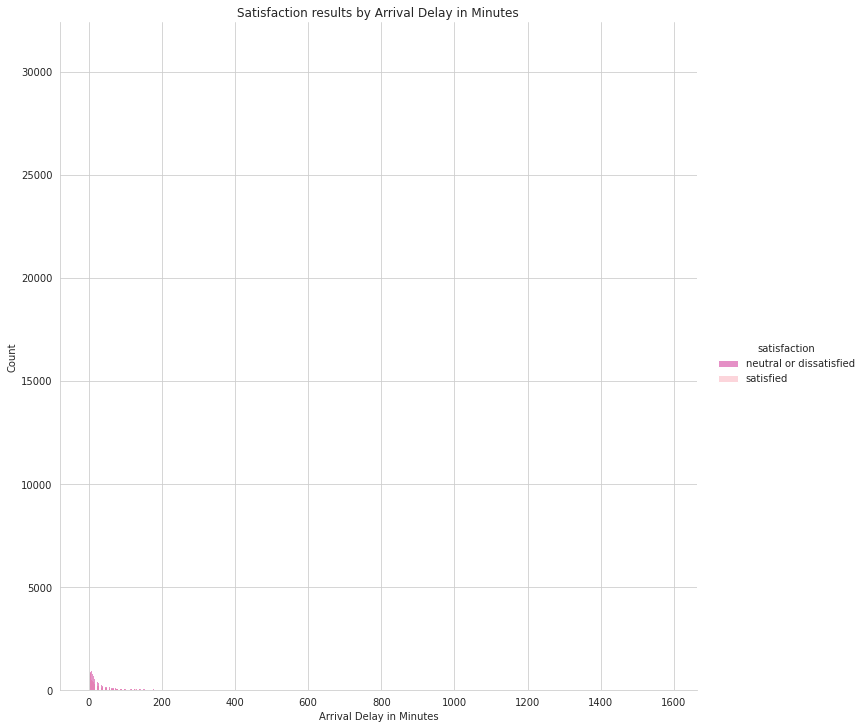

In [102]:
# update null values to 0 
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(0)

# create graph
sns.displot(x = "Arrival Delay in Minutes", data = train, hue ="satisfaction", 
            height = 10,palette ="RdPu_r" )

# format graph
plt.title("Satisfaction results by Arrival Delay in Minutes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [103]:
#round arrival delay to hours
train["Arrival Delay in hour"]= round(train["Arrival Delay in Minutes"]/60,1)

# function scale of delay
# method from https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s
def scale_of_delay (row): 
    if row == 0: 
        return "on time"
    if (row > 0) & (row < 1): 
        return "less than hour"
    if (row >= 1) & (row < 12): 
        return "between 1 to 12 hours"
    if row >= 12:
        return "more than 12 hours"
    else:
        return "0"

# apply function 
train["scale_of_Arrival_delay"] = train["Arrival Delay in hour"].apply(lambda row: scale_of_delay(row))

#reset subset 
personal = train[train["Type of Travel"]=="Personal Travel"]
business =train[train["Type of Travel"]=="Business travel"]

# calcuate dissatisfied_rate
pivot_satisfaction(train,"scale_of_Arrival_delay", False).loc[[3,1,0, 2],:]

,scale_of_Arrival_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate
3,on time,34089,30607,64696,52.691047
1,less than hour,19670,11578,31248,62.948029
0,between 1 to 12 hours,5113,2835,7948,64.330649
2,more than 12 hours,7,5,12,58.333333


In [104]:
# calcuate dissatisfied_rate for scale_of_Arrival_delay - business
pivot_satisfaction(business,"scale_of_Arrival_delay", False).loc[[3,1,0, 2],:]

,scale_of_Arrival_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate
3,on time,16473,27955,44428,37.077969
1,less than hour,10649,11071,21720,49.028545
0,between 1 to 12 hours,2782,2715,5497,50.609423
2,more than 12 hours,5,5,10,50.000000


In [105]:
# calcuate dissatisfied_rate for scale_of_Arrival_delay -  personal 
pivot_satisfaction(personal,"scale_of_Arrival_delay", False).loc[[3,1,0, 2],:]

,scale_of_Arrival_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate
3,on time,17616,2652,20268,86.915335
1,less than hour,9021,507,9528,94.678841
0,between 1 to 12 hours,2331,120,2451,95.104039
2,more than 12 hours,2,0,2,100.000000


# Conclusion 
This was part one of a two part project examining the results of airline passenger feedback. As analysis highlights, there are some issues with the feedback which can cause issues in the future such as relatively young participants and binary classification of gender. Most concerningly, the satisfaction is a binary classification. Therefore the airline is unable to distinguish within the neutral to dissatisfied category, the extent of the issue. There are also aspects such as ticket price, flight location also missing from this dataset. 

Regardless, it appears that the airline has strengths in servicing business travellers. However, their offering especially for eco flights appears to be weak. Passengers also appear to be sensitive to certain aspects of their services and as such the airline should tackle such issues as a priority to improve services. This includes inflight wifi and departure time. That said, if the airline wishes to continue to focus on business travellers aspects such as online booking and seat comfort should be prioritised. 

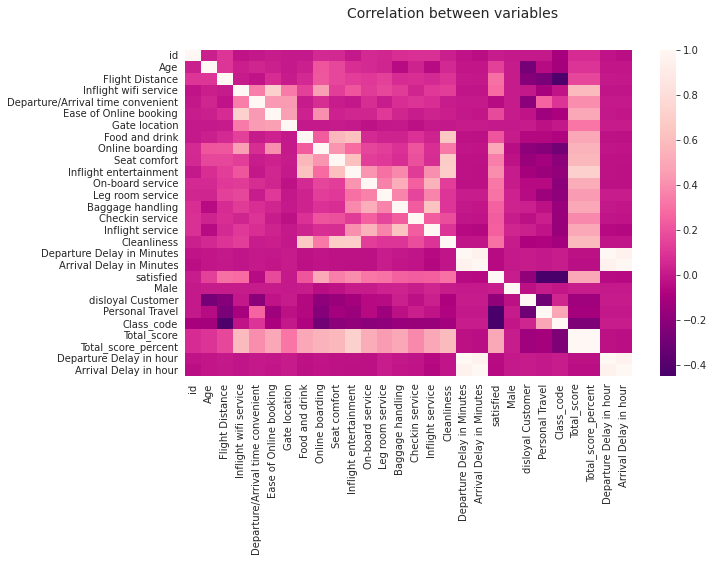

In [106]:
# create graph
plt.figure(figsize = (10,6))
sns.heatmap(train.corr(), cmap = "RdPu_r")

# format graph
plt.suptitle("Correlation between variables ", fontsize = 14,)
plt.show()

# Works cited
Data Science With Chris. 2021. “Kaggle Titanic Competition - Data Analysis.” YouTube. https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s.
